In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv(r"C:\Users\anasagar\Documents\LearnBay\Time Series Forecasting\Timeseries Dataset\Beer Australia.csv")
dataset

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [5]:
### Before Building the Time Series we have to check :
# (i) Data should be in numeric type not in categorical type
# (ii) In dataset one column should be in datetime type and other would be target variable, and if datetime column not as a index then first we have to make datetime column as  a index.
# (iii) Data should be in Sequential type,if not then do
# (iv)  No Missing data should be there,if missing data would be there then handled it.
# (v)   we have to do some measurement like Durbin watson test for checking its a Regressive data or Time Series Forecasting data.
#      -> Durbin watson range(0 to 4), if Durbin watson test would be 2 or Approaximetely then we can say that its not a 
#           Time Series Forecasting data its a Regressive type Problem, If test would be less then 2 or greater then 2 then we can say that its a Timeseries Forecasting
# (vi) we have to check its Trend/Seasonality/Noise(Irregular) data
#     -> Check through Decomposition method or Visualization

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [7]:
# change month type to a Datetime column
dataset['Month']=pd.to_datetime(dataset['Month'])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [9]:
# Check data is in Sequential order or not
print(dataset['Month'].min())
print(dataset['Month'].max())
# its a Sequential Order

1956-01-01 00:00:00
1995-08-01 00:00:00


In [10]:
dataset.tail()

,Month,Monthly beer production
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0
475,1995-08-01,153.0


In [11]:
# month is not as index so make as a index
dataset.set_index(keys='Month',drop=True,inplace=True)

In [12]:
dataset

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [13]:
# Check missing data 
dataset.isnull().sum()
# No missing data

Monthly beer production    0
dtype: int64

# Auto Correlation Check By Durbin Watson Test

In [14]:
import statsmodels.api as sm

In [15]:
durb_wats_Test=sm.stats.durbin_watson(dataset)
print("Dirbin watson test",durb_wats_Test)
if abs(durb_wats_Test)<=1.5 or  abs(durb_wats_Test)>=2.5:
    print("Auto Correlation is Detected, Problem is suitable for Time Series Forecasting")
else:
    print("No Auto Correlation is Detected, Problem is not suitable for Time Series Forecasting")
    

# sm.stats.durbin_watson(dataset)
# sm.stats.durbin_watson(dataset)
# 0.01948649 < 2, so its a TimeSeries Forecasting

Dirbin watson test [0.01948649]
Auto Correlation is Detected, Problem is suitable for Time Series Forecasting


# Through Visualization Check Data is Trend/Seasonality/Noise(Irregular)

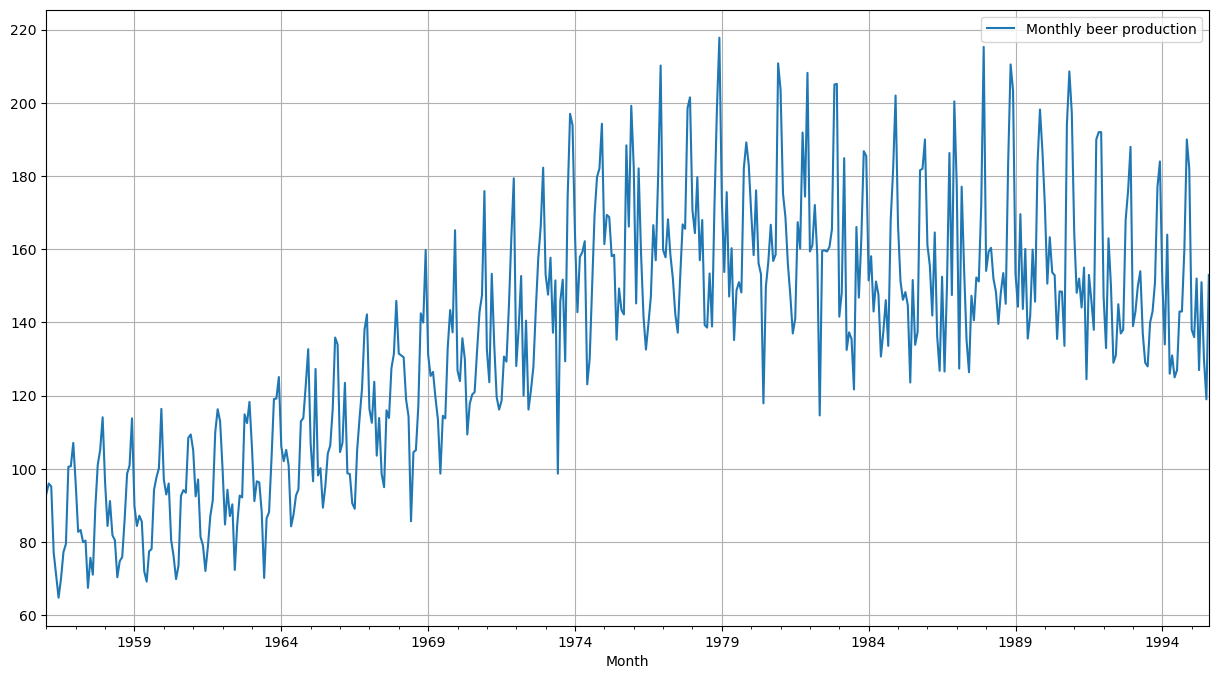

In [16]:
dataset.plot(figsize=(15,8),grid=True)
plt.show()
# Looks Like data is Trend

# Check Through Decomposition Data is Trend/Seasonality/Noise(Irregular)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=14,7
decomposition_additive=seasonal_decompose(dataset,model='additive')
decomposition_multiplicative=seasonal_decompose(dataset,model='multiplicative')


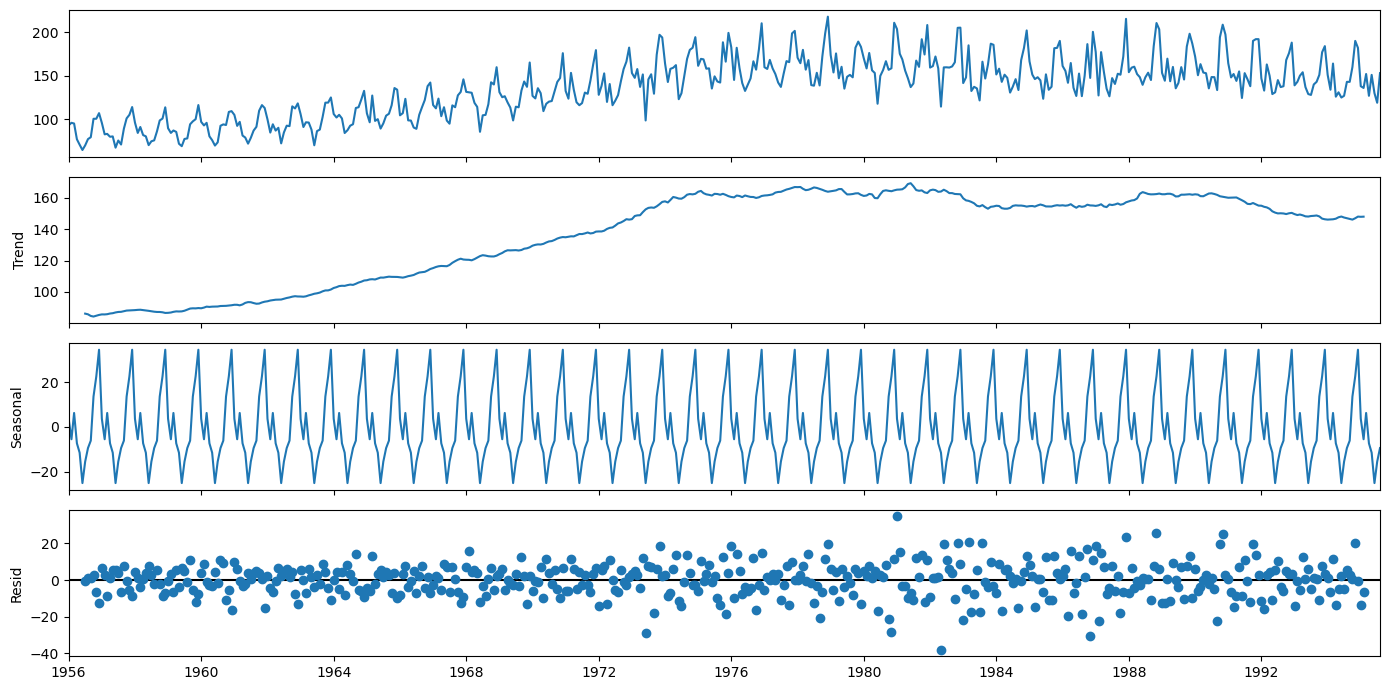

In [18]:
decomposition_additive.plot()
plt.show()

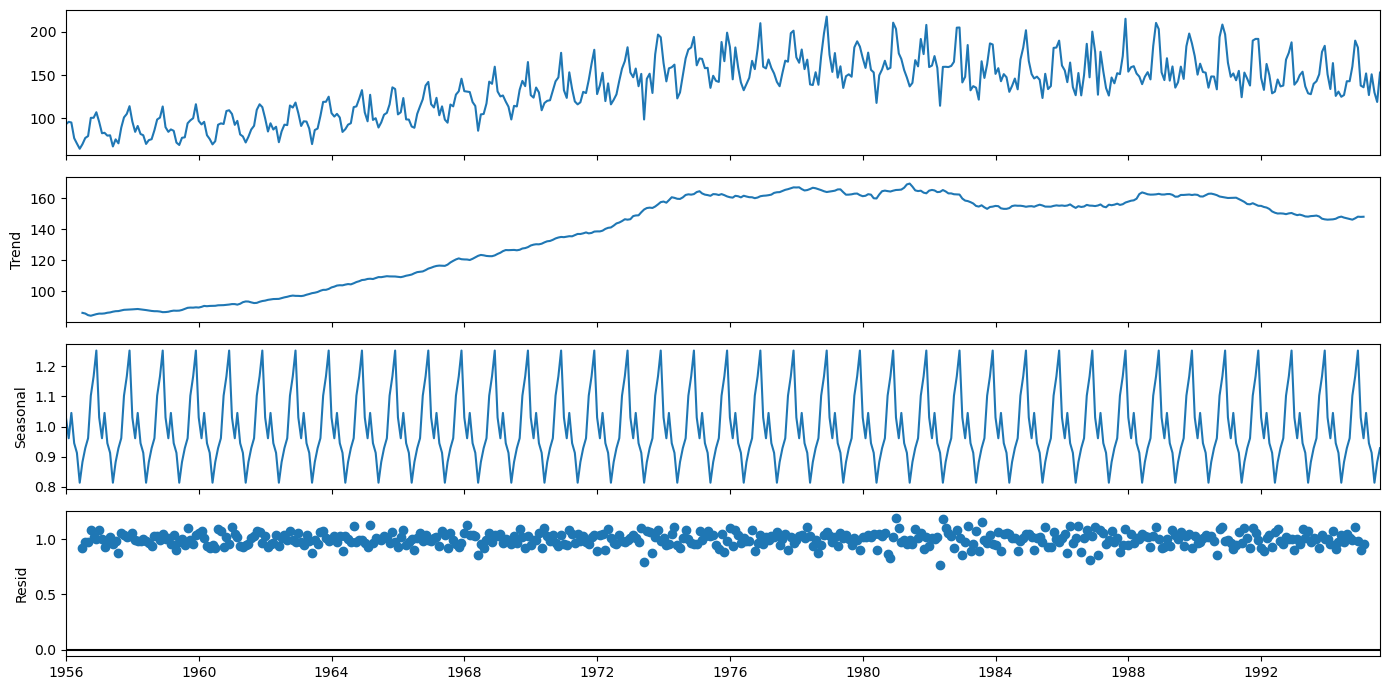

In [19]:
decomposition_multiplicative.plot()
plt.show()

# Dataset should be Stationary - Mandatory

# Method to Check Data is Stationary or not - "Augmented Dickey Fuller Test"

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adf_check(timeseries):
  result=adfuller(timeseries)
  print("****** Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******")
  labels=['ADF stats Test','P-Value','#Lags','No of Observation'] # ADF(Augmented Dickey Fuller) stats test

  for i,j in zip(result,labels):
    print(j+" : "+str(i))

  if result[1]<=0.05:
    print("Strong evidence against null hypothesis and my timeseries is Stationary") # null value means its a Non-Stationary data
  else:
    print("weak evidence against null hypothesis and my timeseries is Non-Stationary")



In [22]:
adf_check(dataset['Monthly beer production'])
# here timeseries is Non-Stationary so first we have to make Stationary then we can build the timeseries.

****** Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF stats Test : -2.2826614187875816
P-Value : 0.1776209982913235
#Lags : 17
No of Observation : 458
weak evidence against null hypothesis and my timeseries is Non-Stationary


In [23]:
dataset['1st Diff']=dataset['Monthly beer production'] - dataset['Monthly beer production'].shift(1)

In [24]:
dataset.head(20)

,Monthly beer production,1st Diff
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,2.8
1956-03-01,95.2,-0.8
1956-04-01,77.1,-18.1
1956-05-01,70.9,-6.2
1956-06-01,64.8,-6.1
1956-07-01,70.1,5.3
1956-08-01,77.3,7.2
1956-09-01,79.5,2.2


In [25]:
adf_check(dataset['1st Diff'].dropna())

****** Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF stats Test : -4.9806637430649285
P-Value : 2.4234117859945662e-05
#Lags : 18
No of Observation : 456
Strong evidence against null hypothesis and my timeseries is Stationary


In [26]:
dataset['Seasonality']=dataset['Monthly beer production'] - dataset['Monthly beer production'].shift(12)

In [27]:
dataset.head(20)

,Monthly beer production,1st Diff,Seasonality
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,2.8,NaN
1956-03-01,95.2,-0.8,NaN
1956-04-01,77.1,-18.1,NaN
1956-05-01,70.9,-6.2,NaN
1956-06-01,64.8,-6.1,NaN
1956-07-01,70.1,5.3,NaN
1956-08-01,77.3,7.2,NaN
1956-09-01,79.5,2.2,NaN


In [28]:
adf_check(dataset['Seasonality'].dropna())

****** Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF stats Test : -2.8967624777520116
P-Value : 0.04572577462359597
#Lags : 17
No of Observation : 446
Strong evidence against null hypothesis and my timeseries is Stationary


In [29]:
# My TimeSeries data Both Trend and Seasonality 
# Trend :d=1
# Seasonality :D=1

In [30]:
# For Building the Time Series Forecasting we have :
    # Trend :
        # p = ?
        # d = 1
        # q = ?
        
    # Seasonality :
        # P = ?
        # D = 1
        # Q = ?
        
# p = partial autocorrelation or autoregressive method
# d = difference (Lag function) or integrated method
# q = autocorrelation or moving avg method

# To find the P and Q value basis graph

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [32]:
dataset.head()

,Monthly beer production,1st Diff,Seasonality
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,2.8,NaN
1956-03-01,95.2,-0.8,NaN
1956-04-01,77.1,-18.1,NaN
1956-05-01,70.9,-6.2,NaN


# Trend

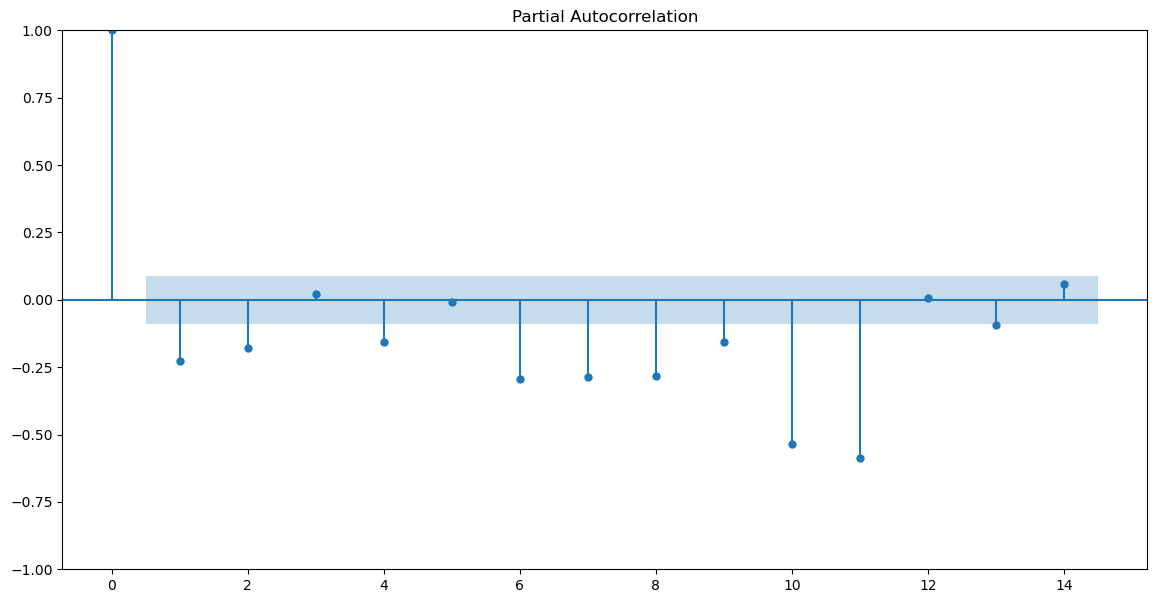

In [33]:
plot_pacf(dataset['1st Diff'].dropna(),lags=14)
plt.show()
# pacf = Partial AutoCorrelation 

In [34]:
# p = 3

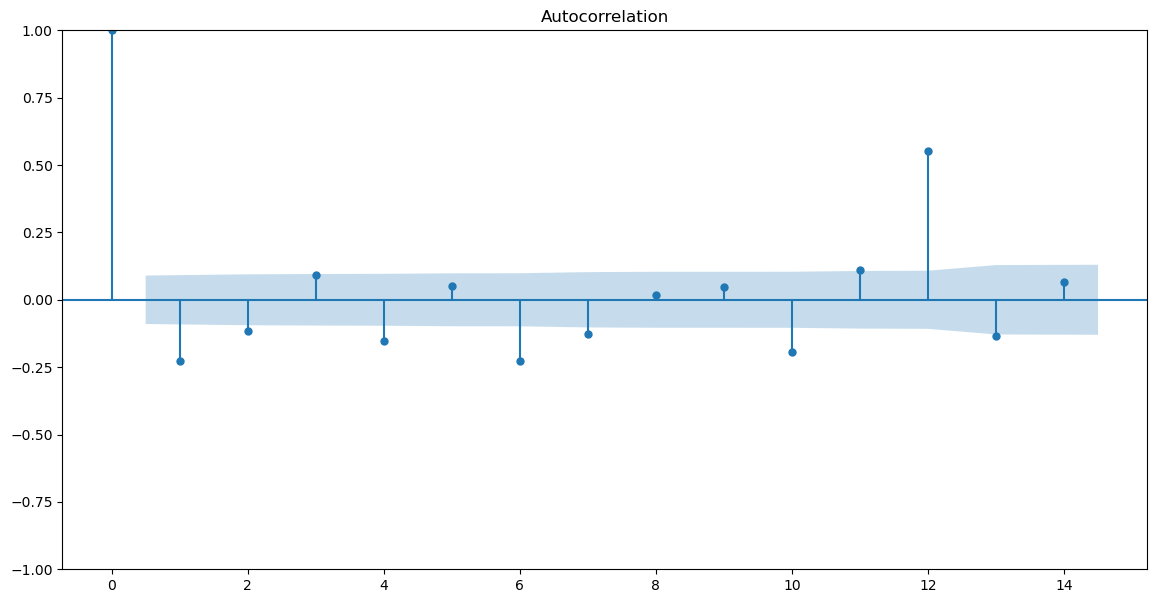

In [35]:
plot_acf(dataset['1st Diff'].dropna(),lags=14)
plt.show()

In [36]:
#q = 0

In [37]:
    # Trend :
        # p = 3
        # d = 1
        # q = 0

# Seasonality

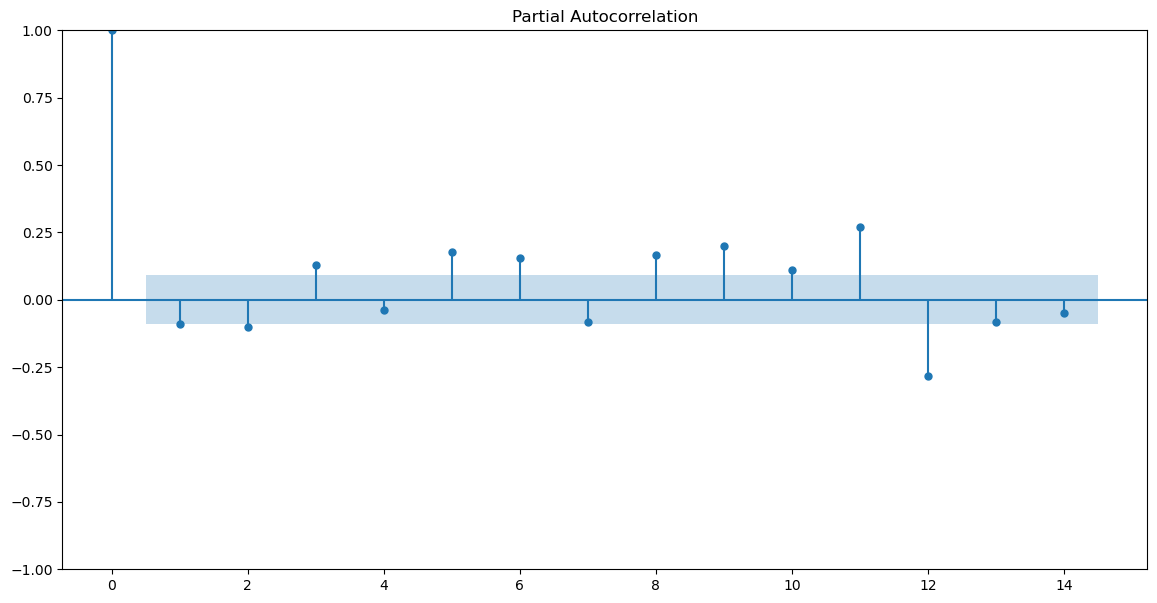

In [38]:
plot_pacf(dataset['Seasonality'].dropna(),lags=14)
plt.show()

In [39]:
# P = 1 or 2


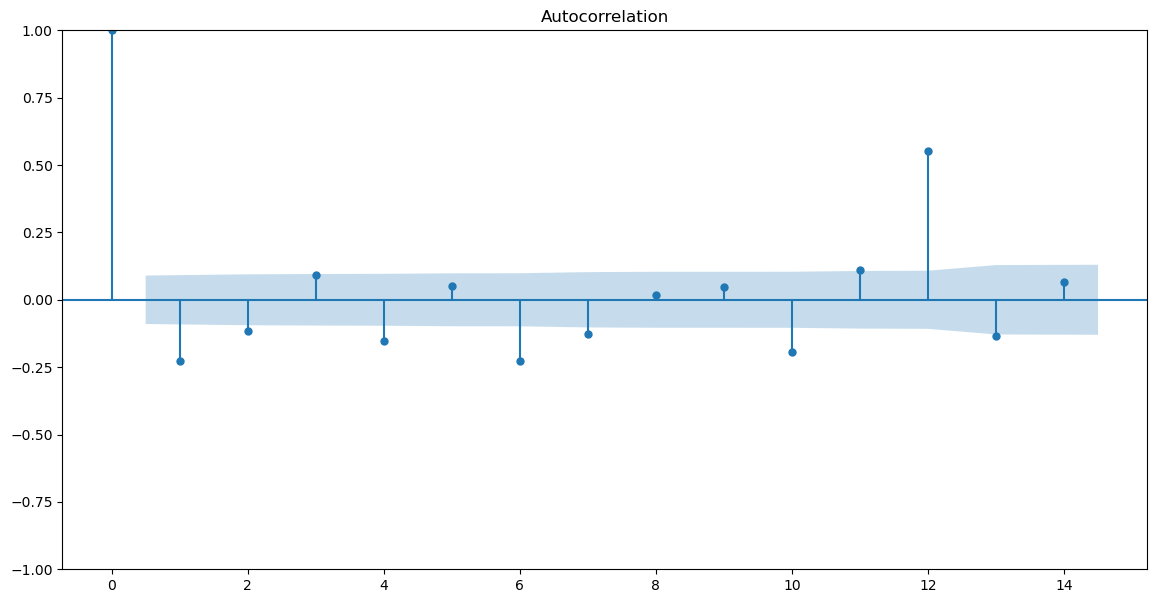

In [40]:
plot_acf(dataset['1st Diff'].dropna(),lags=14)
plt.show()

In [41]:
# Q = 0

In [42]:
# Seasonality :
     # P = 1 or 2
     # D = 1
     # Q = 0   

In [43]:
    # Trend :
        # p = 3
        # d = 1
        # q = 0

# Building Time Series Forecasting Model

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [45]:
# Trend and Seasonality both in dataset so we will go with SARIMA Model
model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=(3,1,0),
                               seasonal_order=(2, 1, 0, 12)) # giving x because in case is there any other external factor also there the price get increase

# order = (p,d,q) means Trend data
# seasonal_order=(P, D, Q, period) means Seasonality data

result=model.fit()
print(result.summary())

C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:            Monthly beer production   No. Observations:                  476
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1803.933
Date:                            Thu, 18 Jan 2024   AIC                           3619.866
Time:                                    14:07:11   BIC                           3644.692
Sample:                                01-01-1956   HQIC                          3629.639
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8807      0.037    -23.859      0.000      -0.953      -0.808
ar.L2         -0.6628      0.041   

# Other Approach

In [46]:
import itertools

p=d=q=range(0,3) # Lags(d) = 2 in Trend and Lags(D) = 1 in Seasonality, here big one is 2 so we will take 2 for range
pdq=list(itertools.product(p,d,q)) # Trend
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]
# p = x[0]
# d = x[1]
# q = x[2]
# period = 12

print('Few parameter combination are :')
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))

Few parameter combination are :
(0, 0, 1) x (0, 0, 1, 12)
(0, 0, 2) x (0, 0, 2, 12)


In [47]:
    # Trend :
        # p = 3
        # d = 1
        # q = 0

In [48]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=param,
#                                            seasonal_order=param_seasonal,enforce_stationary=False,
#                                            enforce_invertibility=False)
#             result = model.fit()
#             print("ARIMA{}x{} - AIC:{}".format(param,param_seasonal,result.aic)) #param - Trend and param_seasonal - Seasonality
#         except:
#             continue

In [49]:
# ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:3618.859085425036
# ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:3572.9155454346437
# RIMA(0, 0, 0)x(2, 2, 2, 12) - AIC:3567.4249571033242
# ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:8.0
# ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:3476.0209754446532
# ARIMA(0, 1, 1)x(1, 2, 2, 12) - AIC:3473.1095489224485
#     ARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:3468.9576097997196
#         ARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:3460.6075681961884
#             ARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:3456.4960253264994
#                 ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:3455.6551540366872
#                     ARIMA(0, 2, 2)x(1, 0, 1, 12) - AIC:2071.777186027456

In [50]:
# Trend and Seasonality both in dataset so we will go with SARIMA Model
model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=(0,0,1),
                               seasonal_order=(1, 0, 1, 12)) # giving x because in case is there any other external factor also there the price get increase

# order = (p,d,q) means Trend data
# seasonal_order=(P, D, Q, period) means Seasonality data

result=model.fit()
print(result.summary())

C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:            Monthly beer production   No. Observations:                  476
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1885.583
Date:                            Thu, 18 Jan 2024   AIC                           3779.167
Time:                                    14:07:12   BIC                           3795.828
Sample:                                01-01-1956   HQIC                          3785.718
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0553      0.042      1.322      0.186      -0.027       0.137
ar.S.L12       0.9976      0.002   

In [51]:
# Trend and Seasonality both in dataset so we will go with SARIMA Model
model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=(0,2,2),
                               seasonal_order=(1, 0, 1, 12)) # giving x because in case is there any other external factor also there the price get increase

# order = (p,d,q) means Trend data
# seasonal_order=(P, D, Q, period) means Seasonality data

result=model.fit()
print(result.summary())

C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:              Monthly beer production   No. Observations:                  476
Model:             SARIMAX(0, 2, 2)x(1, 0, [1], 12)   Log Likelihood               -1788.920
Date:                              Thu, 18 Jan 2024   AIC                           3587.840
Time:                                      14:07:15   BIC                           3608.646
Sample:                                  01-01-1956   HQIC                          3596.023
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9097      0.018   -108.464      0.000      -1.944      -1.875
ma.L2          0.91

In [52]:
# ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:3455.6551540366872

In [53]:
# Trend and Seasonality both in dataset so we will go with SARIMA Model
model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=(0,1,2),
                               seasonal_order=(2, 1, 2, 12)) # giving x because in case is there any other external factor also there the price get increase

# order = (p,d,q) means Trend data
# seasonal_order=(P, D, Q, period) means Seasonality data

result=model.fit()
print(result.summary())

C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:            Monthly beer production   No. Observations:                  476
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1720.828
Date:                            Thu, 18 Jan 2024   AIC                           3455.655
Time:                                    14:07:20   BIC                           3484.619
Sample:                                01-01-1956   HQIC                          3467.058
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1131      0.040    -28.078      0.000      -1.191      -1.035
ma.L2          0.2184      0.037   

In [54]:
#ARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:3460.6075681961884

In [55]:
# Trend and Seasonality both in dataset so we will go with SARIMA Model
model=sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],order=(0,1,2),
                               seasonal_order=(0, 1, 2, 12)) # giving x because in case is there any other external factor also there the price get increase

# order = (p,d,q) means Trend data
# seasonal_order=(P, D, Q, period) means Seasonality data

result=model.fit()
print(result.summary())

C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anasagar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:            Monthly beer production   No. Observations:                  476
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1725.304
Date:                            Thu, 18 Jan 2024   AIC                           3460.608
Time:                                    14:07:22   BIC                           3481.296
Sample:                                01-01-1956   HQIC                          3468.752
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1332      0.041    -27.884      0.000      -1.213      -1.054
ma.L2          0.2338      0.038   

In [56]:
# len(dataset)
476-446

30

In [57]:
len(dataset)

476

In [58]:
# Training with given dataset
dataset['Forecast'] = result.predict(start=446,end=476,dynamic=True)
dataset

,Monthly beer production,1st Diff,Seasonality,Forecast
Month,,,,
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
1995-04-01,127.0,-25.0,1.0,139.306123
1995-05-01,151.0,24.0,20.0,133.834510
1995-06-01,130.0,-21.0,5.0,120.778494


<Axes: xlabel='Month'>

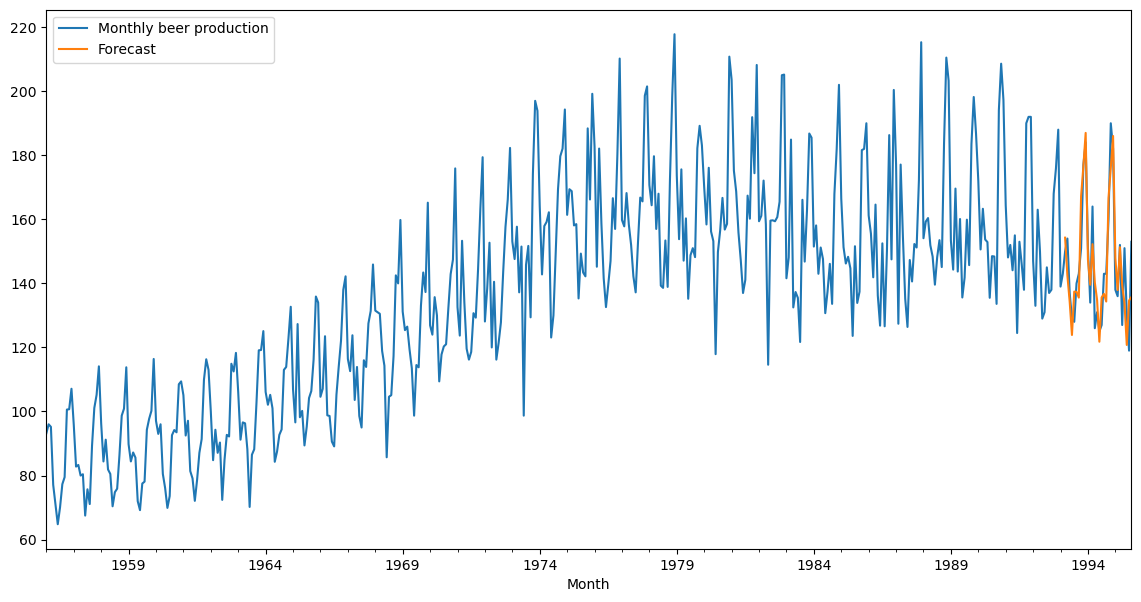

In [59]:
dataset[['Monthly beer production','Forecast']].plot()

# Predict the Forecasting value for 5 Years

In [60]:
from pandas.tseries.offsets import DateOffset

In [61]:
dataset.tail()

,Monthly beer production,1st Diff,Seasonality,Forecast
Month,,,,
1995-04-01,127.0,-25.0,1.0,139.306123
1995-05-01,151.0,24.0,20.0,133.834510
1995-06-01,130.0,-21.0,5.0,120.778494
1995-07-01,119.0,-11.0,-8.0,134.625296
1995-08-01,153.0,34.0,10.0,135.716555


In [62]:
future_date=[dataset.index[-1]+DateOffset(months=x) for x in range(0,61)]

In [63]:
future_date

[Timestamp('1995-08-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-08-01 00:00:00'),
 Timestamp('1997-09-01 00:00:00'),
 Timestamp('1997-10-01 00:00:00'),
 Timestamp('1997-11-01 00:00:00'),
 Timestamp('1997-12-

In [64]:
# future_date start from 1
future_date_df=pd.DataFrame(index=future_date[1:],columns=dataset.columns)

In [65]:
future_date_df

,Monthly beer production,1st Diff,Seasonality,Forecast
1995-09-01,NaN,NaN,NaN,NaN
1995-10-01,NaN,NaN,NaN,NaN
1995-11-01,NaN,NaN,NaN,NaN
1995-12-01,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN


In [66]:
# merge original dataset and future dataset
final_forecasting_dataset=pd.concat([dataset,future_date_df])

In [67]:
final_forecasting_dataset

,Monthly beer production,1st Diff,Seasonality,Forecast
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
2000-04-01,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN
2000-06-01,NaN,NaN,NaN,NaN
2000-07-01,NaN,NaN,NaN,NaN


In [68]:

final_forecasting_dataset['Forecast'] = result.predict(start=476, end=536, dynamic=True)

In [69]:
476+60

536

In [70]:
final_forecasting_dataset

,Monthly beer production,1st Diff,Seasonality,Forecast
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
2000-04-01,NaN,NaN,NaN,134.477353
2000-05-01,NaN,NaN,NaN,133.939295
2000-06-01,NaN,NaN,NaN,120.670939
2000-07-01,NaN,NaN,NaN,127.803001


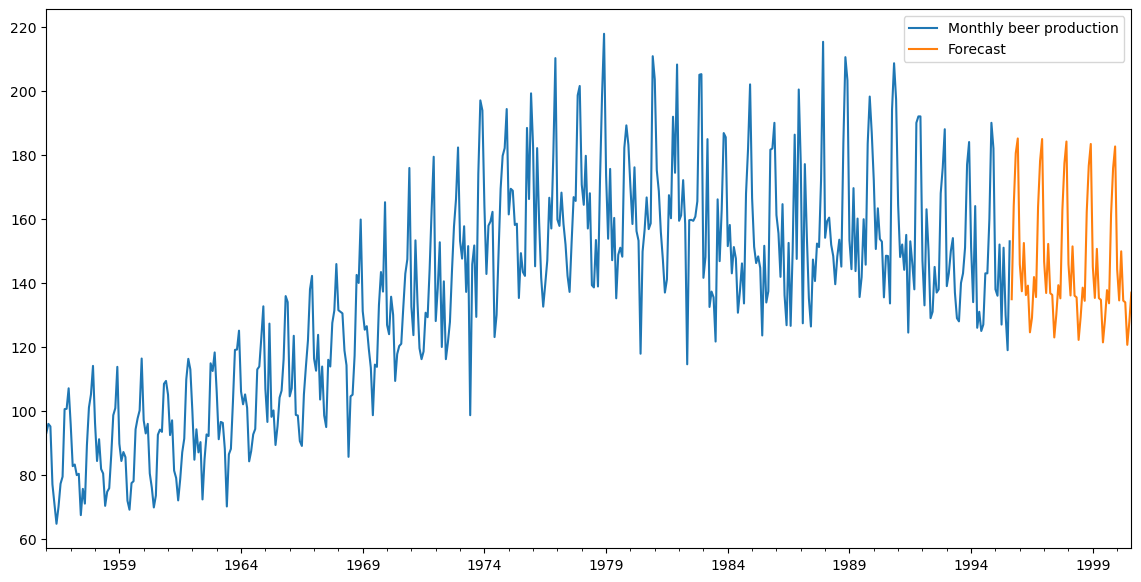

In [71]:
final_forecasting_dataset[['Monthly beer production','Forecast']].plot()
plt.show()

#  THE END


In [72]:
## Validating Forecast

# data is given till dec 2017, so we have predict last 10 to 12 month( jan 2017 to dec 2017),that our prediction is right or wrong.
# last 3 year i am considered as a training data and last 1 year considered as a prediction

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False) # Here start date is given and it take automatically till dec 2017(because data is given till dec 2017)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='one-step ahead Forecast',alpha=0.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel=('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


NameError: name 'results' is not defined

In [ ]:
## calculating RMSE to check overall error

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
mape = (((y_forecasted - y_truth)/(y_truth)).mean())*100
print("The Root Mean Squared Error of our Forecasts is {}".format(round(np.sqrt(mse),2)))
print("MAPE is {}".format(round(mape),2))


In [ ]:
## Visualizing the Forecast Value

pred_uc = results.get_forecast(steps=15)  # predicting 15 month data
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=[14,7])
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()
